In [14]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
from citipy import citipy

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | san cristobal
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | tessalit
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | san ramon de la nueva oran
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | renfrew
Processing Record 15 of Set 1 | bethanien
Processing Record 16 of Set 1 | camacha
Processing Record 17 of Set 1 | monroe
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 21

Processing Record 40 of Set 4 | namibe
Processing Record 41 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 42 of Set 4 | bone
Processing Record 43 of Set 4 | arlit
Processing Record 44 of Set 4 | tungor
Processing Record 45 of Set 4 | erenhot
Processing Record 46 of Set 4 | adre
Processing Record 47 of Set 4 | castro
Processing Record 48 of Set 4 | russell
Processing Record 49 of Set 4 | ardakan
Processing Record 50 of Set 4 | dukat
Processing Record 1 of Set 5 | san nicola
Processing Record 2 of Set 5 | dohar
Processing Record 3 of Set 5 | nyurba
Processing Record 4 of Set 5 | visimo-utkinsk
City not found. Skipping...
Processing Record 5 of Set 5 | terrace
Processing Record 6 of Set 5 | bredasdorp
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | hay river
Processing Record 9 of Set 5 | kavieng
Processing Record 10 of Set 5 | viedma
Processing Record 11 of Set 5 | plouzane
Processing Record 12 of Set 5 | carnarvon
Processing Record 13 of

Processing Record 32 of Set 8 | azimur
City not found. Skipping...
Processing Record 33 of Set 8 | kuche
City not found. Skipping...
Processing Record 34 of Set 8 | along
Processing Record 35 of Set 8 | touros
Processing Record 36 of Set 8 | port augusta
Processing Record 37 of Set 8 | manakara
Processing Record 38 of Set 8 | kutum
Processing Record 39 of Set 8 | hualmay
Processing Record 40 of Set 8 | coihaique
Processing Record 41 of Set 8 | carutapera
Processing Record 42 of Set 8 | port lincoln
Processing Record 43 of Set 8 | prince george
Processing Record 44 of Set 8 | andros town
Processing Record 45 of Set 8 | fortuna
Processing Record 46 of Set 8 | talnakh
Processing Record 47 of Set 8 | asilah
Processing Record 48 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 49 of Set 8 | high prairie
Processing Record 50 of Set 8 | ponca city
Processing Record 1 of Set 9 | preobrazheniye
Processing Record 2 of Set 9 | anchorage
Processing Record 3 of Set 9 | katherine
Pr

Processing Record 21 of Set 12 | ginir
Processing Record 22 of Set 12 | eureka
Processing Record 23 of Set 12 | half moon bay
Processing Record 24 of Set 12 | hays
Processing Record 25 of Set 12 | kanye
Processing Record 26 of Set 12 | shaowu
Processing Record 27 of Set 12 | lowestoft
Processing Record 28 of Set 12 | canutama
Processing Record 29 of Set 12 | poltavka
Processing Record 30 of Set 12 | lata
Processing Record 31 of Set 12 | matamoros
Processing Record 32 of Set 12 | neiafu
Processing Record 33 of Set 12 | williams lake
Processing Record 34 of Set 12 | catalca
Processing Record 35 of Set 12 | dombarovskiy
Processing Record 36 of Set 12 | burnie
Processing Record 37 of Set 12 | mogadishu
Processing Record 38 of Set 12 | qasigiannguit
Processing Record 39 of Set 12 | leo
Processing Record 40 of Set 12 | rungata
City not found. Skipping...
Processing Record 41 of Set 12 | telma
Processing Record 42 of Set 12 | shu
Processing Record 43 of Set 12 | artyk
City not found. Skipping

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ilulissat,69.2167,-51.1000,44.62,81,99,3.44,GL,2021-07-23 00:28:48
1,San Cristobal,7.7669,-72.2250,73.58,98,95,4.09,VE,2021-07-23 00:28:48
2,Butaritari,3.0707,172.7902,83.68,75,63,15.95,KI,2021-07-23 00:28:18
3,Barrow,71.2906,-156.7887,37.18,87,100,11.97,US,2021-07-23 00:26:27
4,Ushuaia,-54.8000,-68.3000,40.66,65,75,3.44,AR,2021-07-23 00:25:33
5,Rikitea,-23.1203,-134.9692,73.27,73,10,18.45,PF,2021-07-23 00:28:49
6,Bluff,-46.6000,168.3333,48.79,68,30,11.68,NZ,2021-07-23 00:28:49
7,Tessalit,20.1986,1.0114,84.20,48,100,12.82,ML,2021-07-23 00:28:49
8,San Ramon De La Nueva Oran,-23.1322,-64.3260,63.34,42,0,2.28,AR,2021-07-23 00:28:50
9,Hermanus,-34.4187,19.2345,44.91,76,32,9.86,ZA,2021-07-23 00:28:50


In [35]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilulissat,GL,2021-07-23 00:28:48,69.2167,-51.1000,44.62,81,99,3.44
1,San Cristobal,VE,2021-07-23 00:28:48,7.7669,-72.2250,73.58,98,95,4.09
2,Butaritari,KI,2021-07-23 00:28:18,3.0707,172.7902,83.68,75,63,15.95
3,Barrow,US,2021-07-23 00:26:27,71.2906,-156.7887,37.18,87,100,11.97
4,Ushuaia,AR,2021-07-23 00:25:33,-54.8000,-68.3000,40.66,65,75,3.44
5,Rikitea,PF,2021-07-23 00:28:49,-23.1203,-134.9692,73.27,73,10,18.45
6,Bluff,NZ,2021-07-23 00:28:49,-46.6000,168.3333,48.79,68,30,11.68
7,Tessalit,ML,2021-07-23 00:28:49,20.1986,1.0114,84.20,48,100,12.82
8,San Ramon De La Nueva Oran,AR,2021-07-23 00:28:50,-23.1322,-64.3260,63.34,42,0,2.28
9,Hermanus,ZA,2021-07-23 00:28:50,-34.4187,19.2345,44.91,76,32,9.86


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [48]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

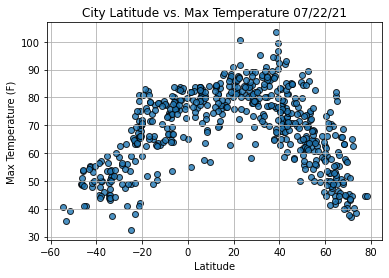

In [49]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

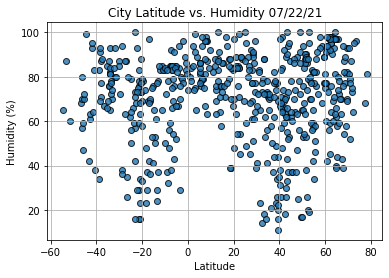

In [50]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

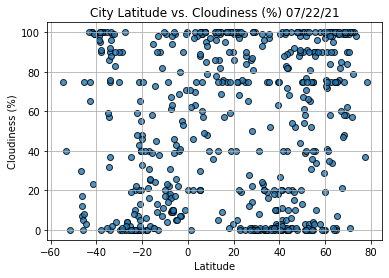

In [51]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

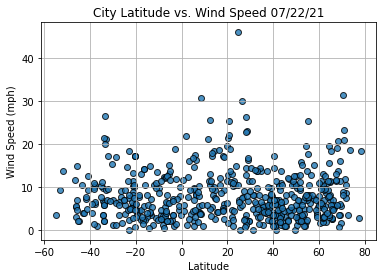

In [52]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()